In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from elmo_on_md.data_loaders.ner_loader import NERLoader
from elmo_on_md.data_loaders.tree_bank_loader import MorphemesLoader

### POS tag exploration

In [2]:
pos_loader = MorphemesLoader()
pos_data = pos_loader.load_data()

In [3]:
print(f"Size of train set: {len(pos_data['train'])}")
print(f"Size of val set: {len(pos_data['dev'])}")
print(f"Size of test set: {len(pos_data['test'])}")

Size of train set: 4937
Size of val set: 500
Size of test set: 716


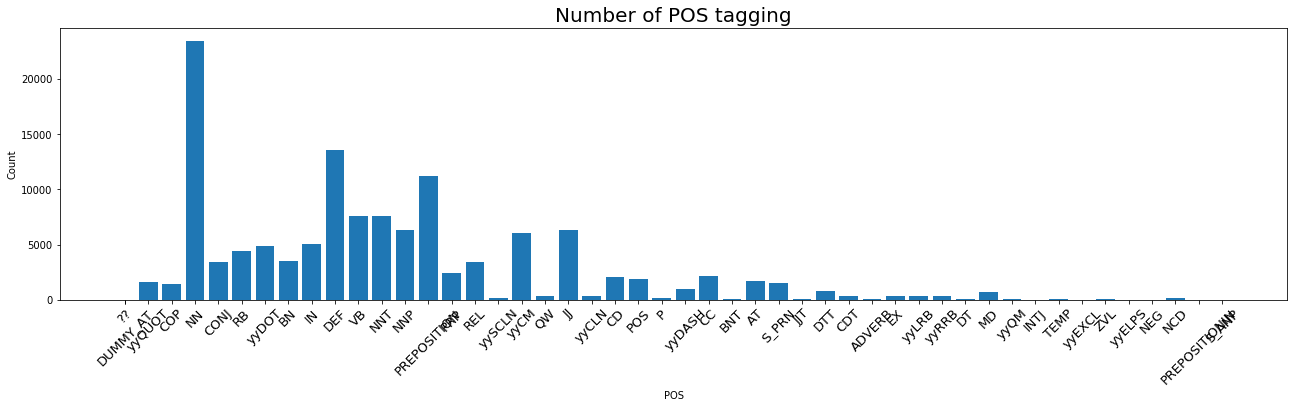

In [4]:
pos_train_data = pos_data['train']
pos_count = pos_train_data.sum(dim=(0,1))

plt.figure(figsize=(22,5))
plt.bar(x=range(len(pos_count)), height=pos_count)
plt.ylabel("Count")
plt.xlabel("POS")
plt.xticks(list(pos_loader.pos_mapping.values()), pos_loader.pos_mapping.keys(), rotation=45, fontsize=13)
plt.title("Number of POS tagging", fontsize=20)
plt.show()

In [5]:
pos_train_data = pos_data['train']
n_morphemes, counts = np.unique(pos_train_data.sum(dim=2), return_counts=True)#.count()
total_tags = counts[1:].sum()
for i in range(1, len(n_morphemes)):
    print(f"{int(n_morphemes[i])} morphemes apeared {counts[i]} times. Which are {counts[i]/total_tags}%")

1 morphemes apeared 64225 times. Which are 0.6868690109514032%
2 morphemes apeared 25209 times. Which are 0.2696034394250513%
3 morphemes apeared 3908 times. Which are 0.04179500342231349%
4 morphemes apeared 162 times. Which are 0.001732546201232033%


### Amount of small classes

In [6]:
count_pos = pos_train_data.flatten(0,1).numpy().sum(axis=0)
small_classes_size = count_pos[count_pos < 100].sum()
precent_small_classes = small_classes_size / count_pos.sum()
print("Percent of data dropped out, with threshold of size of 100: ", precent_small_classes * 100)

Percent of data dropped out, with threshold of size of 100:  0.45821359381079674


# NER Exploration

In [7]:
from elmo_on_md.data_loaders.ner_loader import NERLoader

ner_loader = NERLoader()
ner_data = ner_loader.load_data()
ner_df = pd.concat(ner_data, axis=0)

In [8]:
print("Number of Sentences: ", len(ner_data))
print("Number of Words: ", len(ner_df))

Number of Sentences:  3294
Number of Words:  62901


In [9]:
ner_df.sum(axis=0)

word           נראהשאביטלאברג'יל(לשעבראוז),אוהבתלארקלשחקאצלדן...
name_entity    OI_PERSI_PERSOOI_PERSOOOOOOOI_PERSI_PERSOOOI_M...
not_name                                                   54509
PERS                                                        2152
MISC                                                        1050
LOC                                                         1667
TIME                                                          58
MONEY                                                        551
DATE                                                         639
PERCENT                                                      257
ORG                                                         2018
dtype: object